## ANN NETWORK FOR XNOR function

### Step 1: Define variables

In [ ]:
import theano
import theano.tensor as T
from theano.ifelse import ifelse
import numpy as np
from random import random

#Define variables:
x = T.matrix('x')
w1 = theano.shared(np.array([random(),random()]))
w2 = theano.shared(np.array([random(),random()]))
w3 = theano.shared(np.array([random(),random()]))
b1 = theano.shared(1.)
b2 = theano.shared(1.)
learning_rate = 0.01

##### In this step we have defined all the required variables as in the previous case. Note that now we have 3 weight vectors corresponding to each neuron and 2 bias units corresponding to 2 layers.

### Step 2: Define mathematical expression

In [ ]:
a1 = 1/(1+T.exp(-T.dot(x,w1)-b1))
a2 = 1/(1+T.exp(-T.dot(x,w2)-b1))
x2 = T.stack([a1,a2],axis=1)
a3 = 1/(1+T.exp(-T.dot(x2,w3)-b2))

##### Here we have simply defined mathematical expressions for each neuron in sequence. Note that here an additional step was required where x2 is determined. This is required because we want the outputs of a1 and a2 to be combined into a matrix whose dot product can be taken with the weights vector.

### Step 3: Define gradient and update rule

In [ ]:
a_hat = T.vector('a_hat') #Actual output
cost = -(a_hat*T.log(a3) + (1-a_hat)*T.log(1-a3)).sum()
dw1,dw2,dw3,db1,db2 = T.grad(cost,[w1,w2,w3,b1,b2])

train = function(
    inputs = [x,a_hat],
    outputs = [a3,cost],
    updates = [
        [w1, w1-learning_rate*dw1],
        [w2, w2-learning_rate*dw2],
        [w3, w3-learning_rate*dw3],
        [b1, b1-learning_rate*db1],
        [b2, b2-learning_rate*db2]
    ]
)

##### we have to determine the gradients of 3 weight vectors and 2 bias units and update them accordingly.

 

### Step 4: Train the model

In [ ]:
inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
outputs = [1,0,0,1]

#Iterate through all inputs and find outputs:
cost = []
for iteration in range(30000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
#Print the outputs:
print 'The outputs of the NN are:'
for i in range(len(inputs)):
    print 'The output for x1=%d | x2=%d is %.2f' % (inputs[i][0],inputs[i][1],pred[i])
    
#Plot the flow of cost:
print '\nThe flow of cost during model run is as following:'
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cost)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


The outputs of the NN are:
The output for x1=0 | x2=0 is 0.98
The output for x1=0 | x2=1 is 0.01
The output for x1=1 | x2=0 is 0.01
The output for x1=1 | x2=1 is 0.98

The flow of cost during model run is as following:


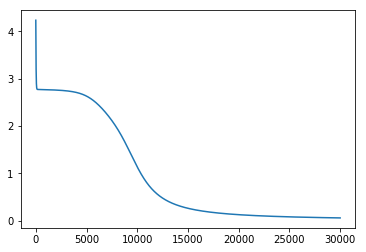

In [1]:
import theano
import theano.tensor as T
from theano.ifelse import ifelse
import numpy as np
from random import random


#Define variables:
x = T.matrix('x')
w1 = theano.shared(np.array([random(),random()]))
w2 = theano.shared(np.array([random(),random()]))
w3 = theano.shared(np.array([random(),random()]))
b1 = theano.shared(1.)
b2 = theano.shared(1.)
learning_rate = 0.01
a1 = 1/(1+T.exp(-T.dot(x,w1)-b1))
a2 = 1/(1+T.exp(-T.dot(x,w2)-b1))
x2 = T.stack([a1,a2],axis=1)
a3 = 1/(1+T.exp(-T.dot(x2,w3)-b2))

a_hat = T.vector('a_hat') #Actual output
cost = -(a_hat*T.log(a3) + (1-a_hat)*T.log(1-a3)).sum()
dw1,dw2,dw3,db1,db2 = T.grad(cost,[w1,w2,w3,b1,b2])

train = theano.function(
    inputs = [x,a_hat],
    outputs = [a3,cost],
    updates = [
        [w1, w1-learning_rate*dw1],
        [w2, w2-learning_rate*dw2],
        [w3, w3-learning_rate*dw3],
        [b1, b1-learning_rate*db1],
        [b2, b2-learning_rate*db2]
    ]
)
inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
outputs = [1,0,0,1]

#Iterate through all inputs and find outputs:
cost = []
for iteration in range(30000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
#Print the outputs:
print('The outputs of the NN are:')
for i in range(len(inputs)):
    print('The output for x1=%d | x2=%d is %.2f' % (inputs[i][0],inputs[i][1],pred[i]))
    
#Plot the flow of cost:
print('\nThe flow of cost during model run is as following:')
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cost)




##### We can see that our network has successfully learned the XNOR function. Also, the cost of the model has reduced to reasonable limit. With this, we have successfully implemented a 2-layer network.